Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-211.756,-221.388,1.87033e-63
2,140.151,4.0,-209.039,-218.656,2.87251e-62
3,140.302,4.0,-206.35,-215.953,4.28786e-61
4,140.452,4.0,-203.69,-213.279,6.22096e-60
5,140.603,4.0,-201.057,-210.632,8.77229e-59
6,140.754,4.0,-198.454,-208.014,1.20228e-57
7,140.905,4.0,-195.878,-205.425,1.60153e-56
8,141.055,4.0,-193.331,-202.864,2.0735e-55
9,141.206,4.0,-190.813,-200.332,2.60922e-54


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,156.281,9.06533,-69.5393,-77.9556,0.366318
2,154.171,7.61809,-68.4712,-77.0077,0.945218
3,154.623,7.77889,-68.4863,-76.9961,0.956255
4,156.734,8.58291,-69.5099,-77.9019,0.386515
5,154.774,7.77889,-68.4964,-76.9974,0.954982
6,153.116,8.98492,-69.329,-77.9298,0.375907
7,155.98,7.21608,-68.8758,-77.3086,0.699626
8,153.417,7.53769,-68.6485,-77.2306,0.756351
9,158.844,9.94975,-71.788,-80.0733,0.0440703


### Snippet 4.23

Density of sigma

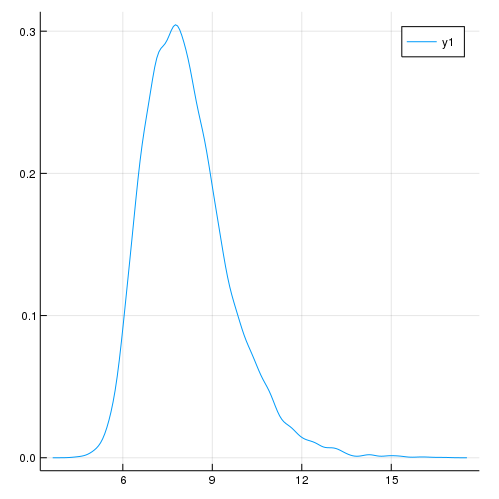

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*